Devoir 1 : Mercier Anna-Eve MERA11530400

In [59]:
#imports : 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [60]:
customer = pd.read_csv("dataset/dataset/Customer.csv")
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  object 
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           10000 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 556.8+ KB


In [61]:
customer.describe()

,age,pages,News_click
count,10000.000000,10000.000000,10000.000000
mean,37.431400,5.995000,4.412000
std,9.490474,2.438559,2.418231
min,18.000000,1.000000,0.000000
25%,31.000000,5.000000,3.000000
50%,37.000000,6.000000,4.000000
75%,43.000000,7.000000,6.000000
max,79.000000,14.000000,10.000000


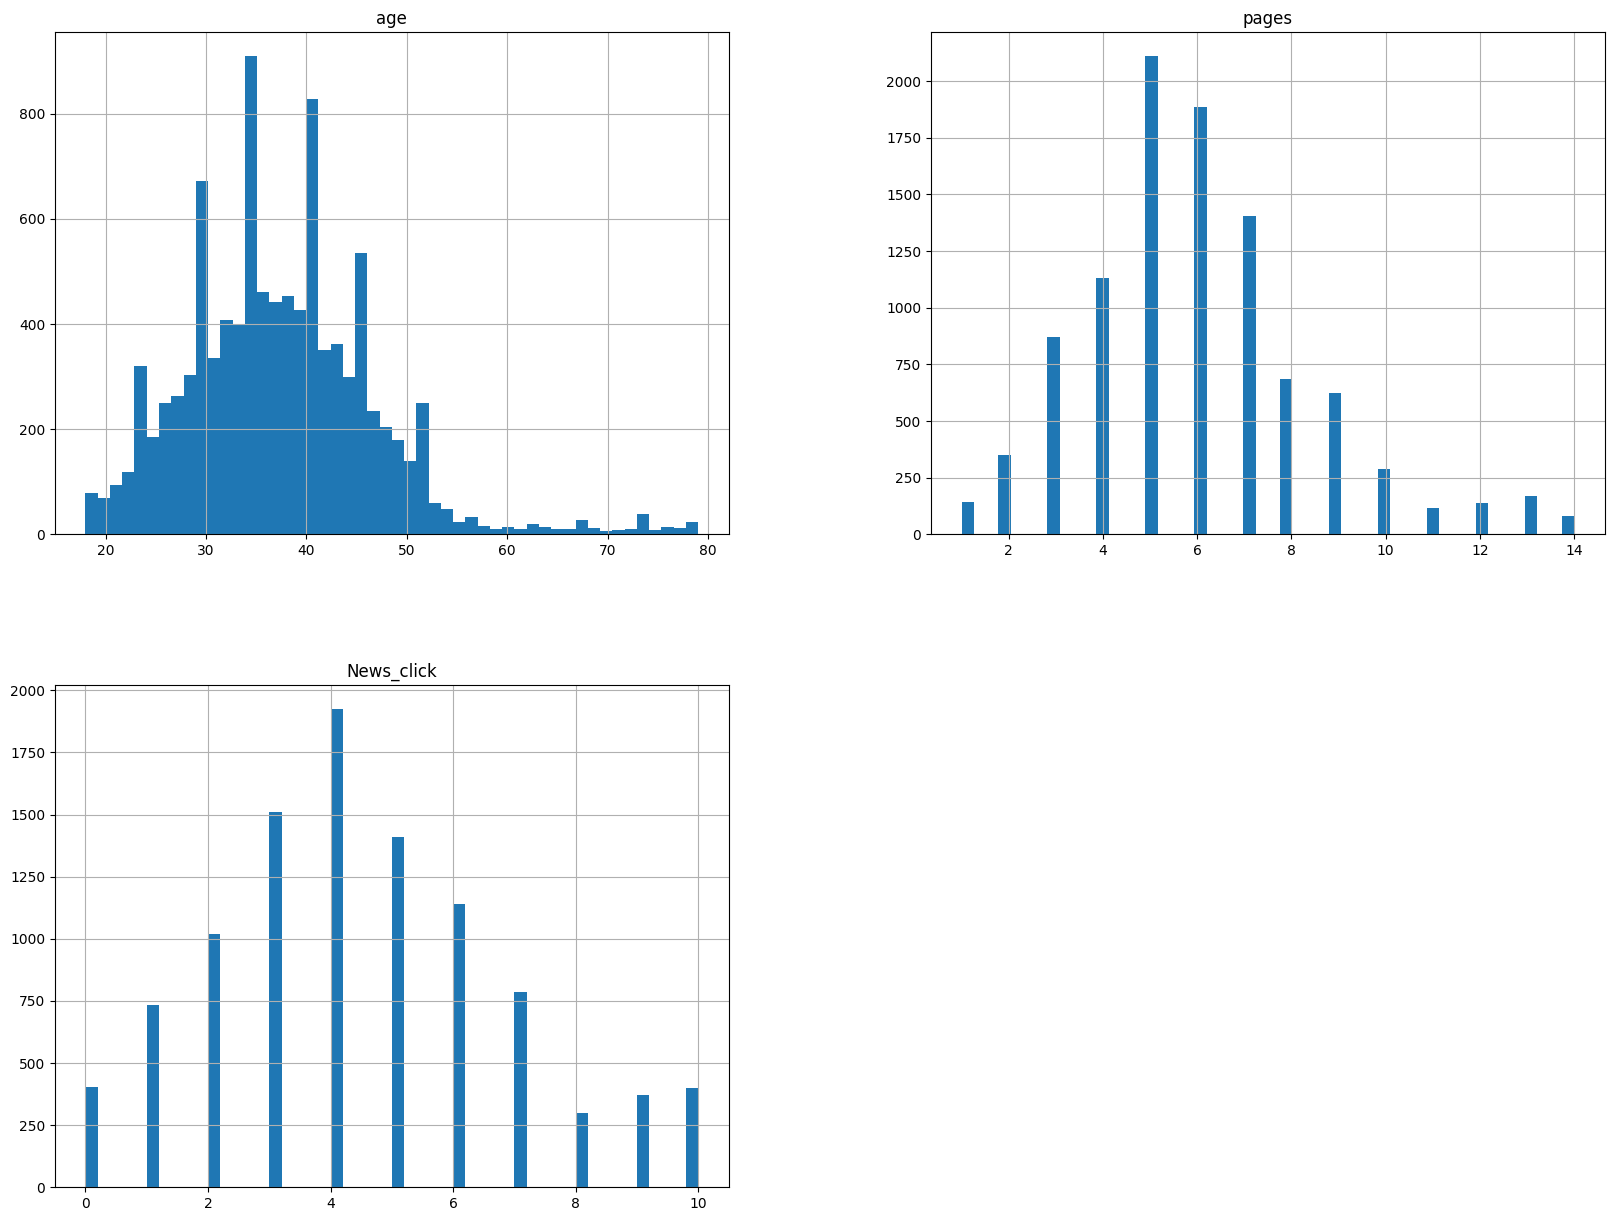

In [62]:
%matplotlib inline
customer.hist(bins=50, figsize=(20,15))
plt.show()

In [63]:
customer.isna().sum() 

age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             0
dtype: int64

Here we can see that no values considered by Panda as Na are present. 
However, this does not exclude the presence of special characters such as -, ?, “ ” etc.

In [64]:
for col in customer.columns:
    print(f"\nColonne : {col}")
    print(customer[col].unique())


Colonne : age
[41. 34. 38. 20. 39. 36. 68. 42. 40. 35. 28. 25. 73. 33. 37. 32. 49. 44.
 29. 53. 21. 45. 24. 51. 57. 72. 31. 47. 30. 23. 43. 26. 54. 50. 27. 48.
 58. 67. 22. 66. 19. 64. 46. 78. 52. 60. 69. 77. 55. 74. 18. 56. 70. 59.
 65. 76. 71. 61. 63. 79. 62. 75.]

Colonne : pages
[ 6.  4.  5.  1. 10.  8.  7. 12.  9.  3.  2. 13. 14. 11.]

Colonne : first_item_prize
['28.0' '15.5' '?' '44.0' '10.0' '57.0' '42.0' '78.0' '102.0' '117.0'
 '22.0']

Colonne : gender
['Fem' 'Masc']

Colonne : ReBuy
[False  True]

Colonne : News_click
[ 4.  2.  7.  5.  3.  0.  1.  6.  9. 10.  8.]

Colonne : country
['China' 'India' 'United States' 'Indonesia' 'Brazil' 'Pakistan' 'Nigeria'
 'Bangladesh' 'Russia' 'Japan' 'Mexico' 'Philippines' 'Vietnam' 'Ethiopia'
 'Egypt' 'Germany' 'Iran' 'Turkey' 'Thailand' 'France' 'United Kingdom'
 'Italy' 'Burma' 'South Africa' 'South Korea' 'Colombia' 'Spain' 'Ukraine'
 'Tanzania' 'Kenya' 'Argentina' 'Algeria' 'Poland' 'Sudan' 'Uganda'
 'Canada' 'Iraq' 'Morocco' 'Peru' 

In [65]:
customer = customer.replace(["unknown", "?"], np.nan)
customer.isna().sum() 

age                 0
pages               0
first_item_prize    3
gender              0
ReBuy               0
News_click          0
country             0
revenue             4
dtype: int64

After taking special characters into account, several Na values are detected.
These values are found in the first_item_prize column corresponding to the price of the first item purchased by the customer and in the revenue column corresponding to the total price of purchases made by the customer.

We will first check that when revenue is missing, first_item_prize exists, and vice versa.

To replace those in first_item_prize, we will use first_item_prize, ReBuy, and revenue.
The ReBuy column indicates whether the customer has already placed a new order on the site.
The revenue column corresponds to the revenue generated by the site thanks to the customer's order.
Thus, to replace the Na values, we can:
- Replace the Na values with the revenue directly when the customer has not placed another order on the site by revenue.
- Replace the Na values with the first_item_prize average of people who have already placed another order when the customer has already placed another order.

To replace the revenue values, we will use first_item_prize, ReBuy, and revenue.
So, to replace the Na values, we can:
- Replace the Na values with the revenue directly when the customer has not placed another order on the site with the first_item_prize.
- Replace the Na values with the average revenue of people who have already placed another order when the customer has already placed another order.

In [66]:
(customer["revenue"].isna() & customer["first_item_prize"].isna()).any()

np.False_

There are no lines, and revenue and first_item_price are NA at the same time.

In [67]:
nb_na_no_rebuy = customer.loc[customer['ReBuy'] == False, 'first_item_prize'].isna().sum() #.loc correspond to one line at a time
print(nb_na_no_rebuy)


3


We observe that all three of our Na values correspond to customers who have never made a recommendation, so we can replace the Na values with the income variable. 

In [68]:

customer['first_item_prize'].fillna(customer['revenue'], inplace=True)


C:\Users\Annam\AppData\Local\Temp\ipykernel_21280\2459284211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer['first_item_prize'].fillna(customer['revenue'], inplace=True)


In [69]:
customer.isna().sum() 

age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             4
dtype: int64

In [70]:
nb_na_no_rebuy = customer.loc[customer['ReBuy'] == False, 'revenue'].isna().sum() #.loc correspond to one line at a time
print(nb_na_no_rebuy)

4


We observe that all four of our Na values correspond to customers who have never made a recommendation, so we can replace the Na values with the income variable. 

In [71]:
customer['revenue'].fillna(customer['first_item_prize'], inplace=True)

C:\Users\Annam\AppData\Local\Temp\ipykernel_21280\3263832776.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer['revenue'].fillna(customer['first_item_prize'], inplace=True)


In [72]:
customer.isna().sum() 

age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             0
dtype: int64

All the Na values have been replaced

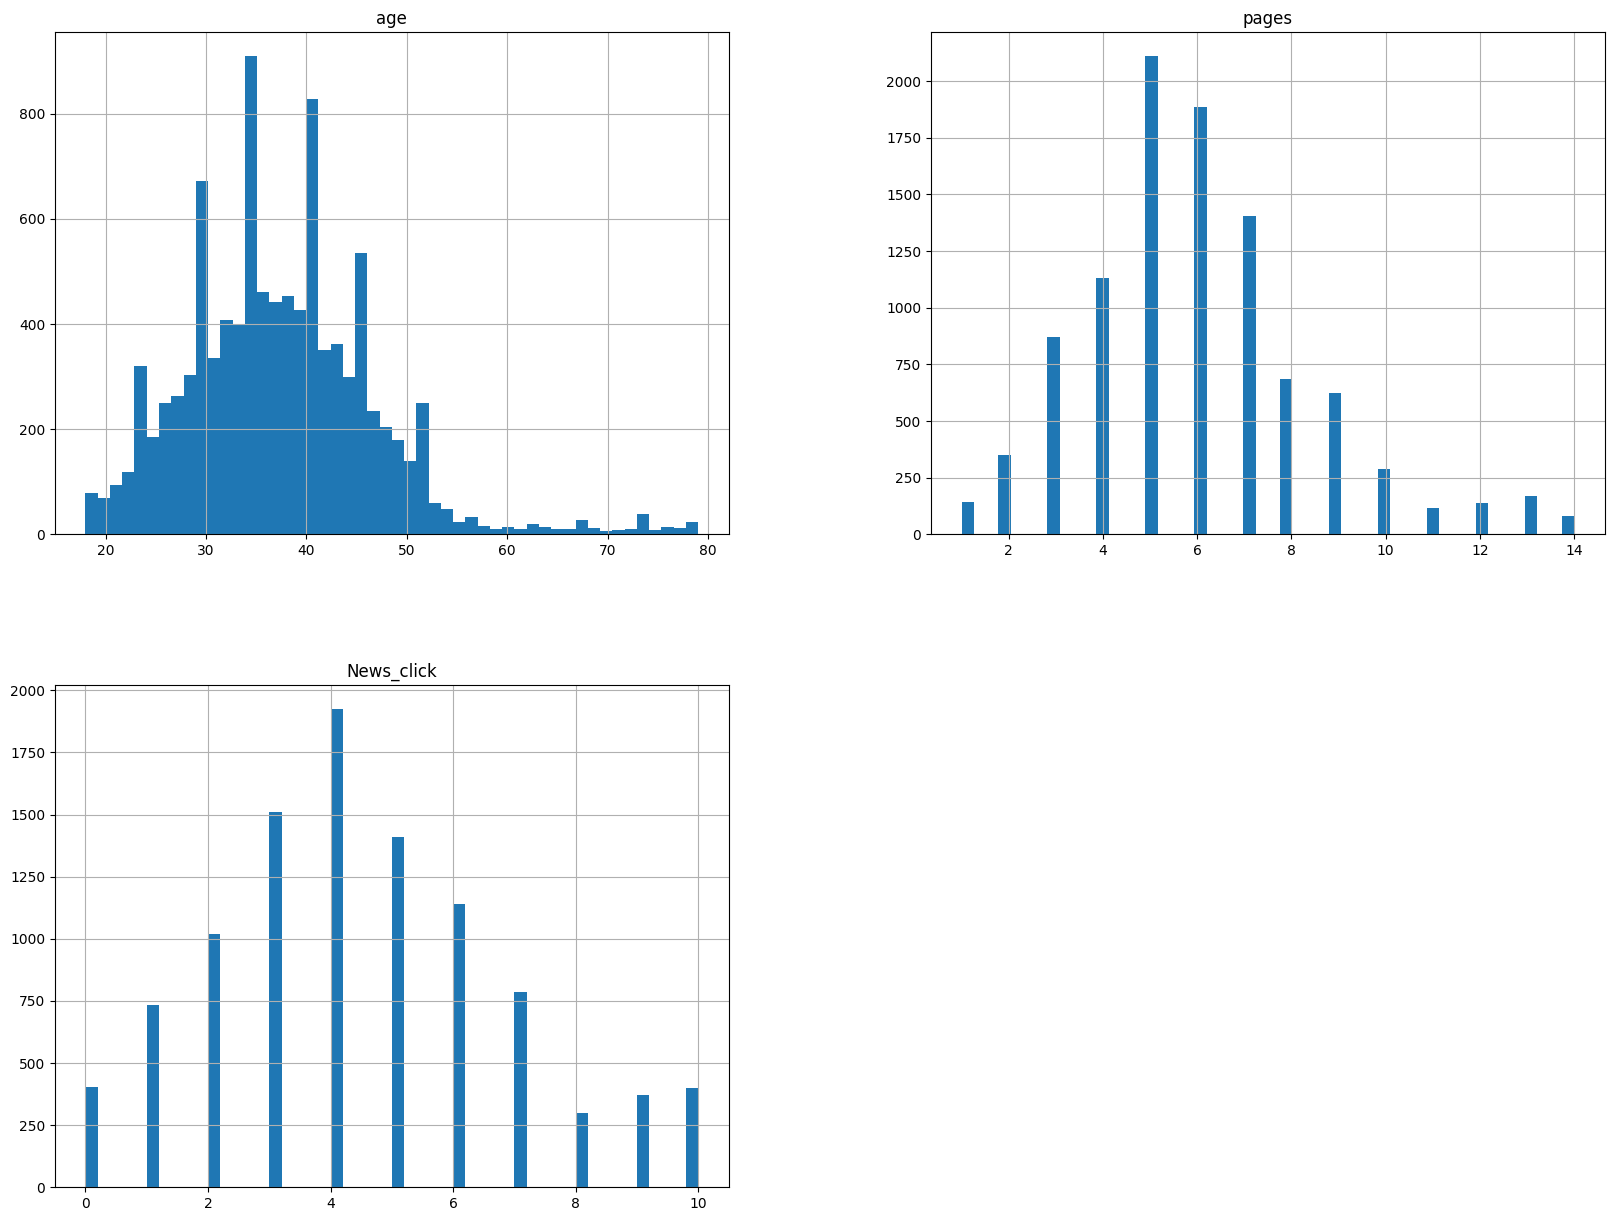

In [73]:
%matplotlib inline
customer.hist(bins=50, figsize=(20,15))
plt.show()

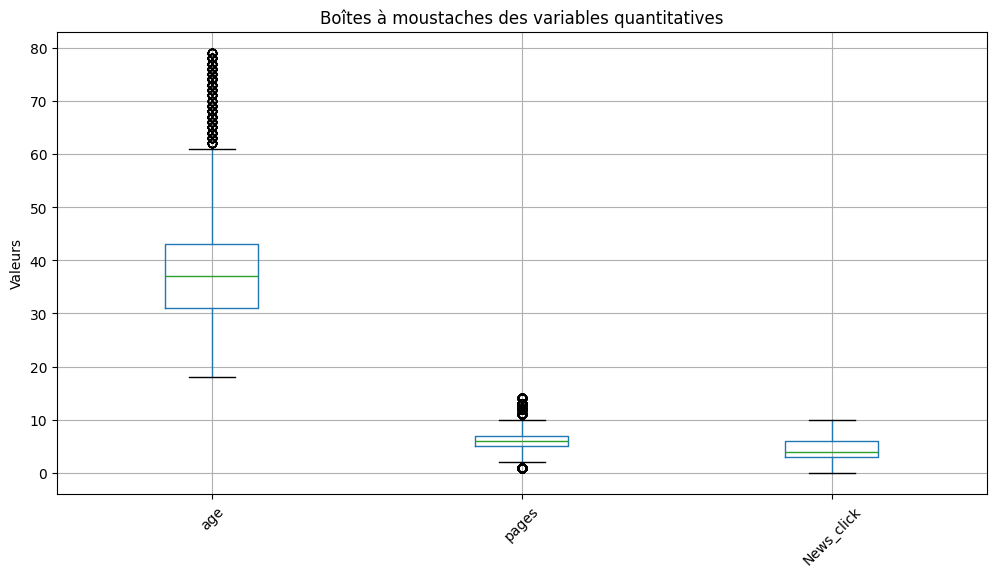

In [74]:
cols_quanti = ["age", "pages", "first_item_prize", "News_click", "revenue"]

plt.figure(figsize=(12, 6))

customer[cols_quanti].boxplot()
plt.title("Boîtes à moustaches des variables quantitatives")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)
plt.show()

Based on the graphs, we can see a normal distribution. 
However, some values may be considered outliers because they are not represented in our data, which makes them underrepresented in our model.

In [75]:
print(customer.dtypes)


age                 float64
pages               float64
first_item_prize     object
gender               object
ReBuy                  bool
News_click          float64
country              object
revenue              object
dtype: object


Pandas considers first_item_prize and revenue as objects, so we must convert them to numbers before we can proceed.

In [76]:
for col in ["first_item_prize", "revenue"]:
    customer[col] = pd.to_numeric(customer[col], errors="coerce")

print(customer.dtypes)

age                 float64
pages               float64
first_item_prize    float64
gender               object
ReBuy                  bool
News_click          float64
country              object
revenue             float64
dtype: object


Quantitative values are well recognized as such.

In [77]:
def outliers_values(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (x < lower_bound) | (x > upper_bound)


outliers_percentages = {
    col: outliers_values(customer[col]).mean(skipna=True) * 100
    for col in cols_quanti
}

print(outliers_percentages)


{'age': np.float64(2.17), 'pages': np.float64(6.5), 'first_item_prize': np.float64(13.389999999999999), 'News_click': np.float64(0.0), 'revenue': np.float64(3.36)}


In [78]:
for col in cols_quanti:
    mask = outliers_values(customer[col])
    customer.loc[mask, col] = np.nan


means = customer[cols_quanti].mean(skipna=True)
for col in cols_quanti:
    customer[col] = customer[col].fillna(means[col])


outliers_percentages = {
    col: outliers_values(customer[col]).mean(skipna=True) * 100
    for col in cols_quanti
}

print(outliers_percentages)


{'age': np.float64(0.36), 'pages': np.float64(0.0), 'first_item_prize': np.float64(0.0), 'News_click': np.float64(0.0), 'revenue': np.float64(1.97)}


    Part 2 : Enrichment of data

In [79]:
country_pop = pd.read_csv("dataset/dataset/CountryPopulation.csv")
country_gdp = pd.read_csv("dataset/dataset/CountryGDP.csv")

In [80]:
for col in country_pop.columns:
    print(f"\nColonne : {col}")
    print(country_pop[col].unique())


Colonne : Country
['China' 'India' 'United States' 'Indonesia' 'Brazil' 'Pakistan' 'Nigeria'
 'Bangladesh' 'Russia' 'Japan' 'Mexico' 'Philippines' 'Vietnam' 'Ethiopia'
 'Egypt' 'Germany' 'Iran' 'Turkey' 'Democratic Republic of the Congo'
 'Thailand' 'France' 'United Kingdom' 'Italy' 'Burma' 'South Africa'
 'South Korea' 'Colombia' 'Spain' 'Ukraine' 'Tanzania' 'Kenya' 'Argentina'
 'Algeria' 'Poland' 'Sudan' 'Uganda' 'Canada' 'Iraq' 'Morocco' 'Peru'
 'Uzbekistan' 'Malaysia' 'Saudi Arabia' 'Venezuela' 'Nepal' 'Afghanistan'
 'Yemen' 'North Korea' 'Ghana' 'Mozambique' 'Australia' 'Taiwan'
 'Ivory Coast' 'Syria' 'Madagascar' 'Angola' 'Cameroon' 'Sri Lanka'
 'Romania' 'Burkina Faso' 'Kazakhstan' 'Niger' 'Netherlands' 'Malawi'
 'Chile' 'Ecuador' 'Guatemala' 'Mali' 'Cambodia' 'Zambia' 'Senegal'
 'Zimbabwe' 'Chad' 'South Sudan' 'Cuba' 'Belgium' 'Tunisia' 'Guinea'
 'Greece' 'Rwanda' 'Czech Republic' 'Somalia' 'Portugal' 'Haiti' 'Benin'
 'Burundi' 'Bolivia' 'Hungary' 'Sweden' 'Azerbaijan' 'Belaru

In [81]:
country_pop.isna().sum() 

Country       0
population    0
dtype: int64

In [82]:
for col in country_gdp.columns:
    print(f"\nColonne : {col}")
    print(country_gdp[col].unique())


Colonne : Country
['Qatar' 'Luxembourg' 'Singapore' 'Norway' 'Brunei' 'United States'
 'Hong Kong' 'Switzerland' 'San Marino[4]' 'Canada' 'Australia' 'Austria'
 'Netherlands' 'Ireland' 'Sweden' 'Kuwait' 'Iceland' 'Germany' 'Taiwan'
 'Belgium' 'Denmark' 'United Kingdom' 'Japan' 'Finland' 'France' 'Israel'
 'South Korea' 'Bahamas The' 'Saudi Arabia' 'Spain' 'Italy' 'New Zealand'
 'United Arab Emirates' 'Oman' 'Bahrain' 'Slovenia' 'Czech Republic'
 'Malta' 'Cyprus' 'Equatorial Guinea' 'Barbados' 'Seychelles' 'Greece'
 'Slovakia' 'Palau' 'Portugal' 'Estonia' 'Lithuania' 'Poland' 'East Timor'
 'Trinidad and Tobago' 'Hungary' 'Chile' 'Latvia' 'Gabon' 'Argentina'
 'Antigua and Barbuda' 'Croatia' 'Russia' 'Malaysia'
 'Saint Kitts and Nevis' 'Uruguay' 'Botswana' 'Lebanon' 'Belarus' 'Panama'
 'Mauritius' 'Mexico' 'Turkey' 'Bulgaria' 'Dominica' 'Grenada'
 'Kazakhstan' 'Venezuela' 'Saint Lucia' 'Iran' 'Romania' 'Costa Rica'
 'Suriname' 'Libya' 'Saint Vincent and the Grenadines' 'Brazil'
 'Montene

In [83]:
country_gdp.isna().sum() 

Country      0
GDP_inhab    0
dtype: int64

No NaN value found 

In [84]:
cols_quanti = ["population"]

def outliers_values(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (x < lower_bound) | (x > upper_bound)

outliers_percentages = {
    col: outliers_values(country_pop[col]).mean(skipna=True) * 100
    for col in cols_quanti
}

print(outliers_percentages)

{'population': np.float64(11.363636363636363)}


In [85]:
for col in cols_quanti:
    mask = outliers_values(country_pop[col])
    country_pop.loc[mask, col] = np.nan

means = country_pop[cols_quanti].mean(skipna=True)
for col in cols_quanti:
    country_pop[col] = country_pop[col].fillna(means[col])

outliers_percentages = {
    col: outliers_values(country_pop[col]).mean(skipna=True) * 100
    for col in cols_quanti
}

print(outliers_percentages)

{'population': np.float64(10.0)}


In [86]:
cols_quanti = ["GDP_inhab"]

def outliers_values(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (x < lower_bound) | (x > upper_bound)

outliers_percentages = {
    col: outliers_values(country_gdp[col]).mean(skipna=True) * 100
    for col in cols_quanti
}

print(outliers_percentages)

{'GDP_inhab': np.float64(3.723404255319149)}


In [87]:
for col in cols_quanti:
    mask = outliers_values(country_gdp[col])
    country_gdp.loc[mask, col] = np.nan

means = country_gdp[cols_quanti].mean(skipna=True)
for col in cols_quanti:
    country_gdp[col] = country_gdp[col].fillna(means[col])

outliers_percentages = {
    col: outliers_values(country_gdp[col]).mean(skipna=True) * 100
    for col in cols_quanti
}

print(outliers_percentages)

{'GDP_inhab': np.float64(3.723404255319149)}


In [88]:
#customer_merged = pd.merge(customer, country_pop, left_on='country', right_on='Country', how='left')
country_pop.rename(columns={'Country': 'country'}, inplace=True)

customer_merged = pd.merge(customer, country_pop, on='country', how='left')
customer_merged.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue,population
0,41.0,6.000000,28.000000,Fem,False,4.0,China,113.0,9.186866e+06
1,34.0,4.000000,15.500000,Fem,True,2.0,China,36.0,9.186866e+06
2,38.0,5.000000,31.240042,Fem,False,7.0,China,111.0,9.186866e+06
3,20.0,5.725134,44.000000,Fem,False,2.0,China,71.0,9.186866e+06
4,39.0,10.000000,10.000000,Fem,True,4.0,China,80.0,9.186866e+06


In [89]:
country_gdp.rename(columns={'Country': 'country'}, inplace=True)

customer_merged = pd.merge(customer_merged, country_gdp, on='country', how='left')
customer_merged.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue,population,GDP_inhab
0,41.0,6.000000,28.000000,Fem,False,4.0,China,113.0,9.186866e+06,9055.0
1,34.0,4.000000,15.500000,Fem,True,2.0,China,36.0,9.186866e+06,9055.0
2,38.0,5.000000,31.240042,Fem,False,7.0,China,111.0,9.186866e+06,9055.0
3,20.0,5.725134,44.000000,Fem,False,2.0,China,71.0,9.186866e+06,9055.0
4,39.0,10.000000,10.000000,Fem,True,4.0,China,80.0,9.186866e+06,9055.0
